### Import Package

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
from pycaret.regression import * 
import numpy as np

### Read the data into dataframe

In [30]:
df=pd.DataFrame(pd.read_excel("window_breakage_data.xlsx",engine='openpyxl'))

### Explore the dataset

In [31]:
df.head(5)

,PFRowstate,Batch,BreakageRate,Yield,YldFrctn,YieldX,Pass/Fail,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,WindowType,GlassSupplier,SiliconViscosity,GlassSupplierLocation
0,1024.0,4011,6.207,93.793358,0.937934,1.216623,Pass,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,Vinyl,Supplier A,8.942454,Minnesota
1,1024.0,4015,2.884,97.110487,0.971105,1.329818,Pass,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,Vinyl,Supplier C,8.409810,Iowa
2,1024.0,4016,4.586,95.413742,0.954137,1.266765,Pass,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,Aluminum,Supplier D,10.338810,Wisconsin
3,1024.0,4017,1.823,98.120298,0.981203,1.376600,Pass,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,Wood,Supplier C,15.181158,Iowa
4,1024.0,4018,0.601,99.228920,0.992289,1.446533,Pass,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,Vinyl,NaN,13.333607,NaN


In [32]:
df=df.drop(['Yield','YldFrctn','YieldX','Pass/Fail','PFRowstate','Batch','WindowType','GlassSupplier','GlassSupplierLocation'],axis=1)
#,'PF Rowstate','Batch','Silicon Viscosity','Glass Supplier Location','Ambient Temp'

In [33]:
df.head(5)

,BreakageRate,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity
0,6.207,69.410127,0.5076,19.421091,1.520784,15.515228,3.299172,79.90,8.942454
1,2.884,62.054341,0.5015,11.809967,2.606436,14.571468,5.597298,83.21,8.409810
2,4.586,56.379612,0.5091,23.466869,1.140074,15.409698,4.831903,92.09,10.338810
3,1.823,62.776805,0.5061,18.177280,1.868036,15.728905,4.719640,78.57,15.181158
4,0.601,NaN,0.5092,23.517670,0.614988,15.408881,5.638548,70.29,13.333607


In [34]:
df.describe()

,BreakageRate,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity
count,1301.000000,1213.000000,1301.000000,1270.000000,1249.000000,1236.000000,1285.000000,1301.000000,1277.000000
mean,6.276304,63.758223,0.502752,16.198353,1.872380,15.718308,4.258189,66.917994,12.036639
std,5.716120,7.158120,0.006113,4.572135,0.802577,1.177423,0.906067,18.309811,2.437012
min,0.004000,51.919507,0.479700,8.392694,0.296450,13.752582,2.690235,7.550000,7.805577
25%,2.547000,56.942267,0.498700,11.944914,1.227402,14.672490,3.491440,53.830000,9.875872
50%,4.460000,64.424635,0.502900,16.338422,1.901043,15.680710,4.285967,73.070000,12.031070
75%,8.193000,70.039760,0.507000,20.166265,2.536933,16.731976,5.033848,81.160000,14.114239
max,36.156000,75.568636,0.523100,24.098396,3.217969,17.747635,5.809628,98.050000,16.196003


In [35]:
print(df.columns)

Index(['BreakageRate', 'WindowSize', 'Glassthickness', 'AmbientTemp',
       'Cutspeed', 'EdgeDeletionrate', 'SpacerDistance', 'Windowcolor',
       'SiliconViscosity'],
      dtype='object')


### Setting up parameters

In [36]:
#Set the target variable, train test split, normalization, transformation on both target and other variables
prediction_model = setup(data = df, target = 'BreakageRate', train_size=0.8,  normalize=True,transformation=True,transform_target=True)

,Description,Value
0,session_id,5949
1,Target,BreakageRate
2,Original Data,"(1301, 9)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1040, 8)"


### Run it and see what is the best models for us 

In [37]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0080,7.1363,2.6557,0.7800,0.4653,1.9701,0.1760
rf,Random Forest Regressor,2.0681,7.6834,2.7541,0.7630,0.4737,2.0372,0.2890
catboost,CatBoost Regressor,2.0631,7.6120,2.7468,0.7616,0.4748,1.9328,2.0820
gbr,Gradient Boosting Regressor,2.0644,7.7875,2.7691,0.7609,0.4772,1.8798,0.1520
lightgbm,Light Gradient Boosting Machine,2.1002,7.8505,2.7891,0.7533,0.4914,2.1180,0.5200
xgboost,Extreme Gradient Boosting,2.1794,8.2375,2.8667,0.7362,0.5085,2.0966,0.2740
knn,K Neighbors Regressor,2.4359,11.5158,3.3692,0.6493,0.5298,1.9171,0.0320
huber,Huber Regressor,2.6771,13.3034,3.6223,0.5941,0.5666,2.5051,1.4450
ada,AdaBoost Regressor,2.7323,14.0452,3.7099,0.5794,0.5626,1.6556,0.0950
dt,Decision Tree Regressor,2.8126,13.4615,3.6612,0.5749,0.6805,2.2850,0.0220


### Create models

In [38]:
hb=create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4868,9.8737,3.1422,0.4539,0.6241,2.5760
1,2.2066,8.6818,2.9465,0.6371,0.5029,1.3309
2,2.8325,15.9274,3.9909,0.6398,0.5890,1.9311
3,2.5507,10.5671,3.2507,0.6115,0.5225,0.9275
4,2.6345,11.6798,3.4176,0.5939,0.5496,1.1559
5,2.9196,17.8826,4.2288,0.6184,0.5403,9.4138
6,2.8200,14.5551,3.8151,0.6112,0.6408,2.2316
7,2.9500,18.1828,4.2641,0.6447,0.5604,2.6164
8,2.5540,12.7551,3.5714,0.6398,0.4959,1.2829
9,2.8169,12.9282,3.5956,0.4905,0.6401,1.5851


In [39]:
lightgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1074,6.7285,2.5939,0.6278,0.5413,1.6651
1,1.7773,5.1534,2.2701,0.7846,0.4428,1.1262
2,2.0359,7.4997,2.7386,0.8304,0.4737,1.1214
3,2.0505,6.6582,2.5803,0.7552,0.4559,0.6498
4,2.3626,9.0620,3.0103,0.6849,0.4678,0.8000
5,2.1370,9.8450,3.1377,0.7899,0.4531,8.0691
6,2.2093,8.4270,2.9029,0.7749,0.5726,1.7326
7,2.1694,10.0144,3.1646,0.8043,0.5090,3.8874
8,1.9226,6.8358,2.6145,0.8070,0.4281,0.9522
9,2.2297,8.2807,2.8776,0.6737,0.5695,1.1767


In [40]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9430,5.4447,2.3334,0.6989,0.5053,1.5838
1,1.6092,4.2902,2.0713,0.8207,0.3846,1.0029
2,2.1500,8.6389,2.9392,0.8046,0.4628,1.0702
3,2.1916,7.3239,2.7063,0.7307,0.4651,0.6574
4,1.9820,6.3839,2.5266,0.7780,0.4413,0.7719
5,1.9442,9.0455,3.0076,0.8070,0.4197,7.0347
6,2.0874,7.1626,2.6763,0.8087,0.5334,1.4516
7,2.1489,9.3620,3.0597,0.8170,0.4892,3.6625
8,1.8873,6.6880,2.5861,0.8111,0.4097,1.2654
9,2.1363,7.0228,2.6501,0.7232,0.5425,1.2002


In [41]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4349,9.5345,3.0878,0.4726,0.6043,2.3379
1,2.1878,9.1996,3.0331,0.6155,0.4881,1.2061
2,2.9778,18.1887,4.2648,0.5886,0.5900,1.7934
3,2.6380,11.6931,3.4195,0.5701,0.5240,0.8664
4,2.7328,12.6429,3.5557,0.5604,0.5496,1.0646
5,2.9589,19.8320,4.4533,0.5768,0.5331,8.3836
6,2.8963,15.5229,3.9399,0.5854,0.6377,2.0545
7,3.0825,20.7067,4.5505,0.5953,0.5618,2.4502
8,2.6360,14.4660,3.8034,0.5915,0.5028,1.1621
9,2.8106,13.3978,3.6603,0.4720,0.6311,1.4682


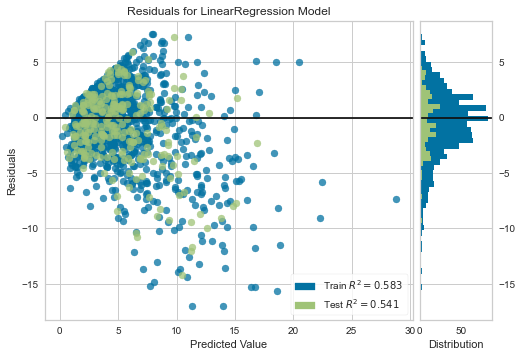

In [42]:
plot_model(lr)

### get the coeficient from the linear model

In [43]:
beta=list(hb.coef_)

In [44]:
beta

[-0.1372940704358419,
 -0.5573018987306869,
 0.11479658281714522,
 0.0765910164534124,
 0.22316969671493844,
 0.028199543394959673,
 0.017395086427556015,
 0.020155419130866853]

### get the intercept from the linear model

In [19]:
intercept=hb.intercept_

### get the columns from the linear model

In [20]:
xtrain_cols = get_config('X_train').columns

In [21]:
col=list(xtrain_cols)

In [22]:
col

['WindowSize',
 'Glassthickness',
 'AmbientTemp',
 'Cutspeed',
 'EdgeDeletionrate',
 'SpacerDistance',
 'Windowcolor',
 'SiliconViscosity']

### Create dictionary combine column name and its coefficient

In [45]:
j=0
coef={}
while j != len(beta):
    for i in col:
        coef[i]=beta[j]
        j=j+1

In [46]:
coef

{'WindowSize': -0.1372940704358419,
 'Glassthickness': -0.5573018987306869,
 'AmbientTemp': 0.11479658281714522,
 'Cutspeed': 0.0765910164534124,
 'EdgeDeletionrate': 0.22316969671493844,
 'SpacerDistance': 0.028199543394959673,
 'Windowcolor': 0.017395086427556015,
 'SiliconViscosity': 0.020155419130866853}

### Build the optimization model

In [48]:
from pyomo.environ import *
model = ConcreteModel()
        
model.A=Set(initialize=col)
lb={}
ub={}

#setting the lower and upper bound of each decision variables

for i in col:
    try:
        lb[i]=df[i].min()
    except:
        lb[i]=0
    try:
        ub[i]=df[i].max()
    except:
        ub[i]=1
def fb(model, i):
    return (lb[i], ub[i])

model.window= Var(model.A, domain=NonNegativeReals, bounds=fb)

#uncomment the below can make sure the opjective value i s greater than 0 but it is not necessary
#model.weight = Constraint(expr = sum(coef[i] * model.window[i] for i in col ) + intercept  >=0)

# Model Objective
model.objective = Objective(expr=sum(coef[i] * model.window[i] for i in col ) + intercept , sense=minimize)

# Solve the model
opt = SolverFactory('cplex_direct')
results = opt.solve(model)

### Print the result of optimization model

In [49]:
print("Print values for all variables")
ans=[]
for v in model.component_data_objects(Var):
    print (str(v), v.value)
    ans.append(v.value)
model.display()

Print values for all variables
window[WindowSize] 75.5686360445619
window[Glassthickness] 0.5231
window[AmbientTemp] 8.3926943748109
window[Cutspeed] 0.296449841495603
window[EdgeDeletionrate] 13.7525820685551
window[SpacerDistance] 2.69023543648422
window[Windowcolor] 7.55
window[SiliconViscosity] 7.80557684451342
Model unknown

  Variables:
    window : Size=8, Index=A
        Key              : Lower             : Value             : Upper            : Fixed : Stale : Domain
             AmbientTemp :   8.3926943748109 :   8.3926943748109 : 24.0983957314007 : False : False : NonNegativeReals
                Cutspeed : 0.296449841495603 : 0.296449841495603 :  3.2179686505273 : False : False : NonNegativeReals
        EdgeDeletionrate :  13.7525820685551 :  13.7525820685551 : 17.7476352276281 : False : False : NonNegativeReals
          Glassthickness :            0.4797 :            0.5231 :           0.5231 : False : False : NonNegativeReals
        SiliconViscosity :  7.80557684451

In [51]:
df_empty = df[0:0]
df_empty=df_empty.drop(['BreakageRate'],axis=1)

### use our optimized solution to predict window breakage rate see if the rate is significant lower

In [52]:
df2 = pd.DataFrame([ans], columns=col)
pd.concat([df2, df_empty])

,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,7.55,7.805577


In [53]:
predict_model(et, data = df2)

,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,7.55,7.805577,1.1872


In [54]:
predict_model(lr, data = df2)

,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,7.55,7.805577,0.01584


In [55]:
predict_model(hb, data = df2)

,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,7.55,7.805577,0.013194


In [56]:
predict_model(lightgbm, data = df2)

,WindowSize,Glassthickness,AmbientTemp,Cutspeed,EdgeDeletionrate,SpacerDistance,Windowcolor,SiliconViscosity,Label
0,75.568636,0.5231,8.392694,0.29645,13.752582,2.690235,7.55,7.805577,1.174865
